In [3]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("/content/youtube_for python.csv")
df.head()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201,02-06-2016 00:00,0,2,6,2016,Thursday,0.024,723,...,0,0,40.38,81,23531,533.1636,51,0.561,41118,27.66
1,1,391,10-06-2016 00:00,8,10,6,2016,Friday,0.056,727,...,0,0,39.85,156,11478,500.5628,33,0.648,41627,5.85
2,2,133,14-06-2016 00:00,4,14,6,2016,Tuesday,0.014,76,...,0,0,30.88,41,6153,70.7287,8,0.089,38713,7.07
3,3,14,29-06-2016 00:00,15,29,6,2016,Wednesday,0.004,18,...,0,0,103.05,14,4398,17.6251,2,0.017,35245,5.60
4,4,45,01-07-2016 00:00,2,1,7,2016,Friday,0.000,0,...,0,0,55.70,25,14659,104.3341,28,0.000,46218,8.62


In [6]:
df.shape

(364, 70)

In [7]:
df.columns

Index(['ID', 'Video Duration', 'Video Publish Time', 'Days Since Publish',
       'Day', 'Month', 'Year', 'Day of Week', 'Revenue per 1000 Views (USD)',
       'Monetized Playbacks (Estimate)', 'Playback-Based CPM (USD)',
       'CPM (USD)', 'Ad Impressions', 'Estimated AdSense Revenue (USD)',
       'DoubleClick Revenue (USD)', 'YouTube Ads Revenue (USD)',
       'Watch Page Ads Revenue (USD)', 'YouTube Premium (USD)',
       'Transaction Revenue (USD)', 'Transactions',
       'Revenue from Transactions (USD)', 'Reactions', 'Chat Messages Count',
       'Reminders Set', 'Stream Hours', 'Remix Views', 'Remix Count',
       'Subscribers from Posts', 'New Comments', 'Shares', 'Like Rate (%)',
       'Dislikes', 'Likes', 'Unsubscribes', 'New Subscribers',
       'Returned Items (USD)', 'Unconfirmed Commissions (USD)',
       'Approved Commissions (USD)', 'Orders', 'Total Sales Volume (USD)',
       'End Screen Click-Through Rate (%)', 'End Screen Impressions',
       'End Screen Clicks', 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    int64  
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    int64  
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

In [9]:
df.isnull().sum()

,0
ID,0
Video Duration,0
Video Publish Time,0
Days Since Publish,0
Day,0
...,...
Watch Time (hours),0
Subscribers,0
Estimated Revenue (USD),0
Impressions,0


Data Cleaning & Formatting

Convert date column to datetime

In [12]:
df['Video Publish Time'] = pd.to_datetime(
    df['Video Publish Time'],
    dayfirst=True,
    errors='coerce'
)

In [13]:
df['Video Publish Time'].head()

,Video Publish Time
0,2016-06-02
1,2016-06-10
2,2016-06-14
3,2016-06-29
4,2016-07-01


In [14]:
df['Video Publish Time'].isna().sum()

np.int64(0)

Extract useful date parts

In [15]:
df[['Video Publish Time', 'Day', 'Month', 'Year', 'Day of Week']].head()

,Video Publish Time,Day,Month,Year,Day of Week
0,2016-06-02,2,6,2016,Thursday
1,2016-06-10,10,6,2016,Friday
2,2016-06-14,14,6,2016,Tuesday
3,2016-06-29,29,6,2016,Wednesday
4,2016-07-01,1,7,2016,Friday


Check for duplicate rows

In [16]:
df.duplicated().sum()

np.int64(0)

Checking for invalid or negative values

Revenue check

In [17]:
(df['Estimated Revenue (USD)'] < 0).sum()

np.int64(0)

Views check

In [18]:
(df['Views'] < 0).sum()

np.int64(0)

Standardize column names.This makes coding & Power BI easier.

In [20]:
df.columns = df.columns.str.strip().str.replace(' ', '_')

Feature Understanding

Creating Derived KPIs.Engagement Rate

In [21]:
df['Engagement_Rate'] = (
    (df['Likes'] + df['Shares'] + df['New_Comments']) / df['Views']
) * 100

Revenue per View

In [ ]:
df['Revenue_per_View'] = df['Estimated_Revenue_(USD)'] / df['Views']

Net Subscriber Growth

In [23]:
df['Net_Subscriber_Growth'] = df['New_Subscribers'] - df['Unsubscribes']

Saving cleaned data as CSV

In [30]:
cleaned_file_name = "youtube_channel_cleaned_data.csv"
df.to_csv(cleaned_file_name, index=False)

Downloading

In [31]:
from google.colab import files
files.download(cleaned_file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Exploratory Data Analysis

Revenue Distribution

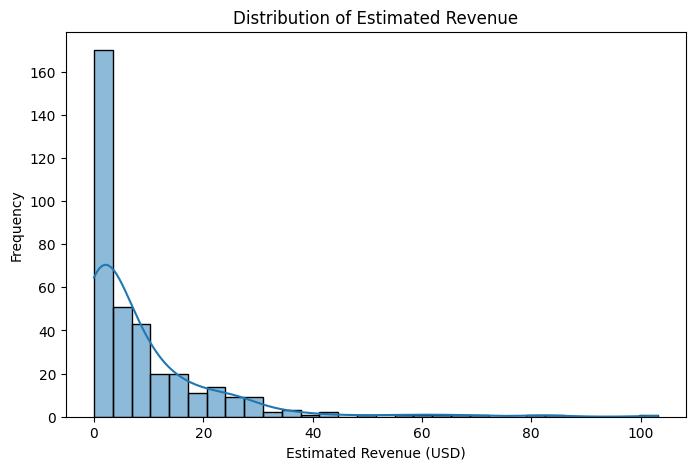

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['Estimated_Revenue_(USD)'], bins=30, kde=True)
plt.title('Distribution of Estimated Revenue')
plt.xlabel('Estimated Revenue (USD)')
plt.ylabel('Frequency')
plt.show()


Views vs Revenue

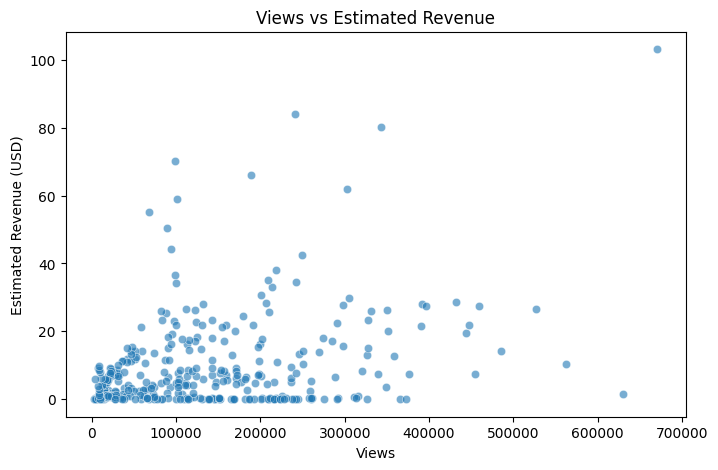

In [25]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=df['Views'],
    y=df['Estimated_Revenue_(USD)'],
    alpha=0.6
)
plt.title('Views vs Estimated Revenue')
plt.xlabel('Views')
plt.ylabel('Estimated Revenue (USD)')
plt.show()

Engagement Rate vs Revenue

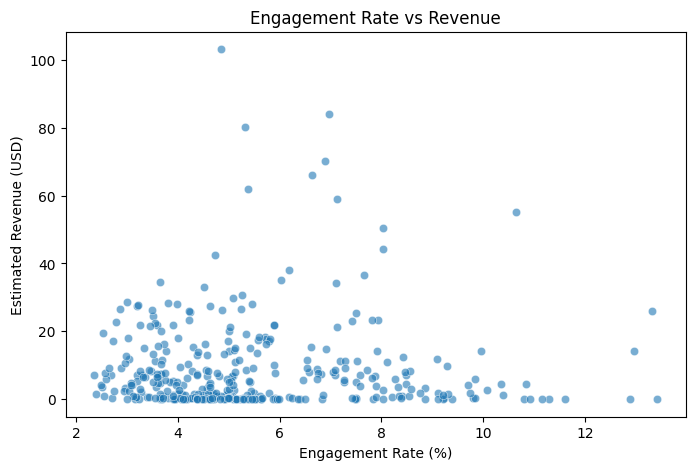

In [26]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=df['Engagement_Rate'],
    y=df['Estimated_Revenue_(USD)'],
    alpha=0.6
)
plt.title('Engagement Rate vs Revenue')
plt.xlabel('Engagement Rate (%)')
plt.ylabel('Estimated Revenue (USD)')
plt.show()

Revenue Over Time

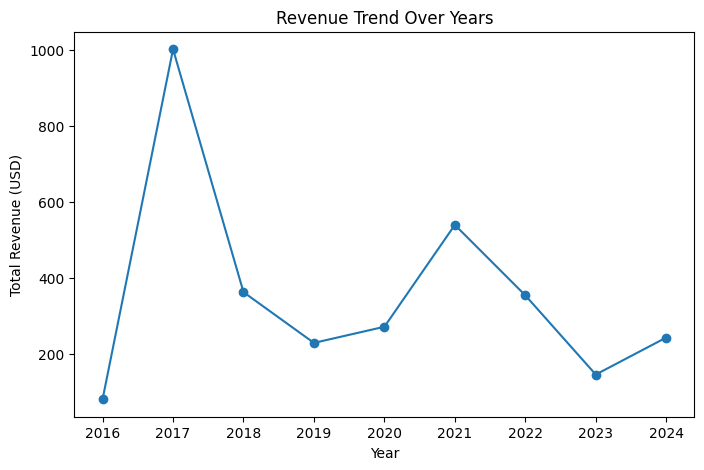

In [27]:
revenue_trend = df.groupby('Year')['Estimated_Revenue_(USD)'].sum()

revenue_trend.plot(kind='line', figsize=(8, 5), marker='o')
plt.title('Revenue Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Total Revenue (USD)')
plt.show()

Best Upload Day

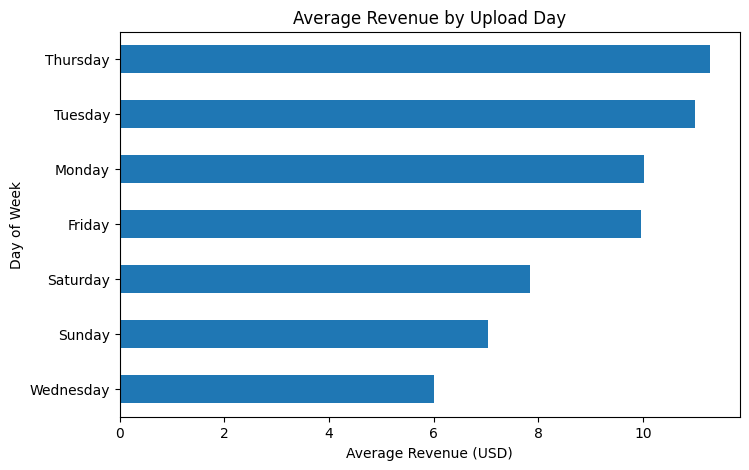

In [28]:
day_revenue = df.groupby('Day_of_Week')['Estimated_Revenue_(USD)'].mean()

day_revenue.sort_values().plot(kind='barh', figsize=(8, 5))
plt.title('Average Revenue by Upload Day')
plt.xlabel('Average Revenue (USD)')
plt.ylabel('Day of Week')
plt.show()